In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [8]:
df = pd.read_csv('/Users/sanjay/Desktop/project/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [11]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [20]:
print(df['num'].value_counts())

num
1    509
0    411
Name: count, dtype: int64


In [18]:
for i in range(df.shape[0]):
    if(df.loc[i,'num']>0):
        df.loc[i,'num']=1

In [19]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/3448778995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num', palette='coolwarm')


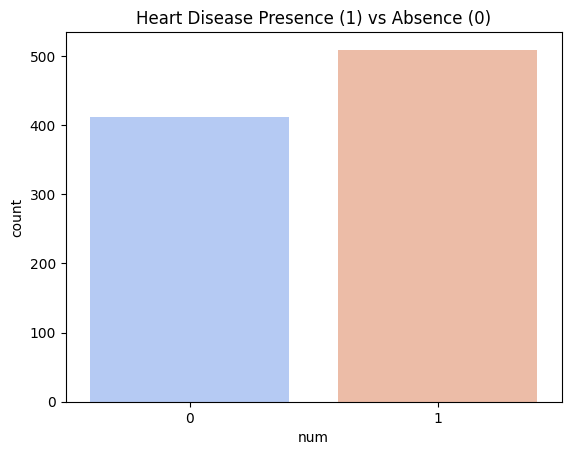

In [22]:
import seaborn as sns
sns.countplot(data=df, x='num', palette='coolwarm')
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('num')

outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_info.items()), columns=['Feature', 'Outlier Count'])
print(outlier_df)

    Feature  Outlier Count
0        id              0
1       age              0
2  trestbps             28
3      chol            183
4    thalch              2
5   oldpeak             16
6        ca             20


In [24]:
df.drop(columns=['id'], inplace=True)

In [25]:
threshold = 0.5  # 50%
missing_ratio = df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > threshold].index
df.drop(columns=drop_cols, inplace=True)

In [26]:
df.drop_duplicates(inplace=True)

# 4. Handle remaining missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

In [29]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,NaN,0.5,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,1
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,NaN,0.5,NaN,0


/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel

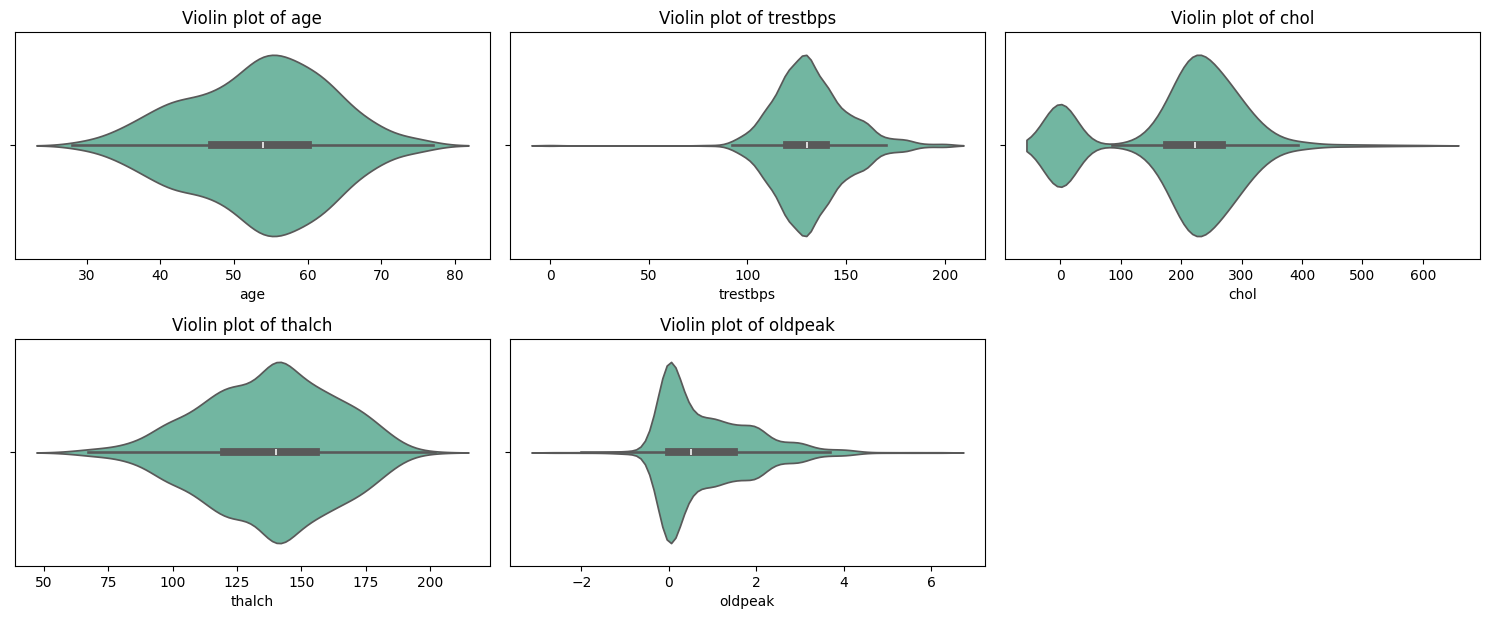

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('num')
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=df, x=col, palette='Set2')
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()

/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1957799159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1957799159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipy

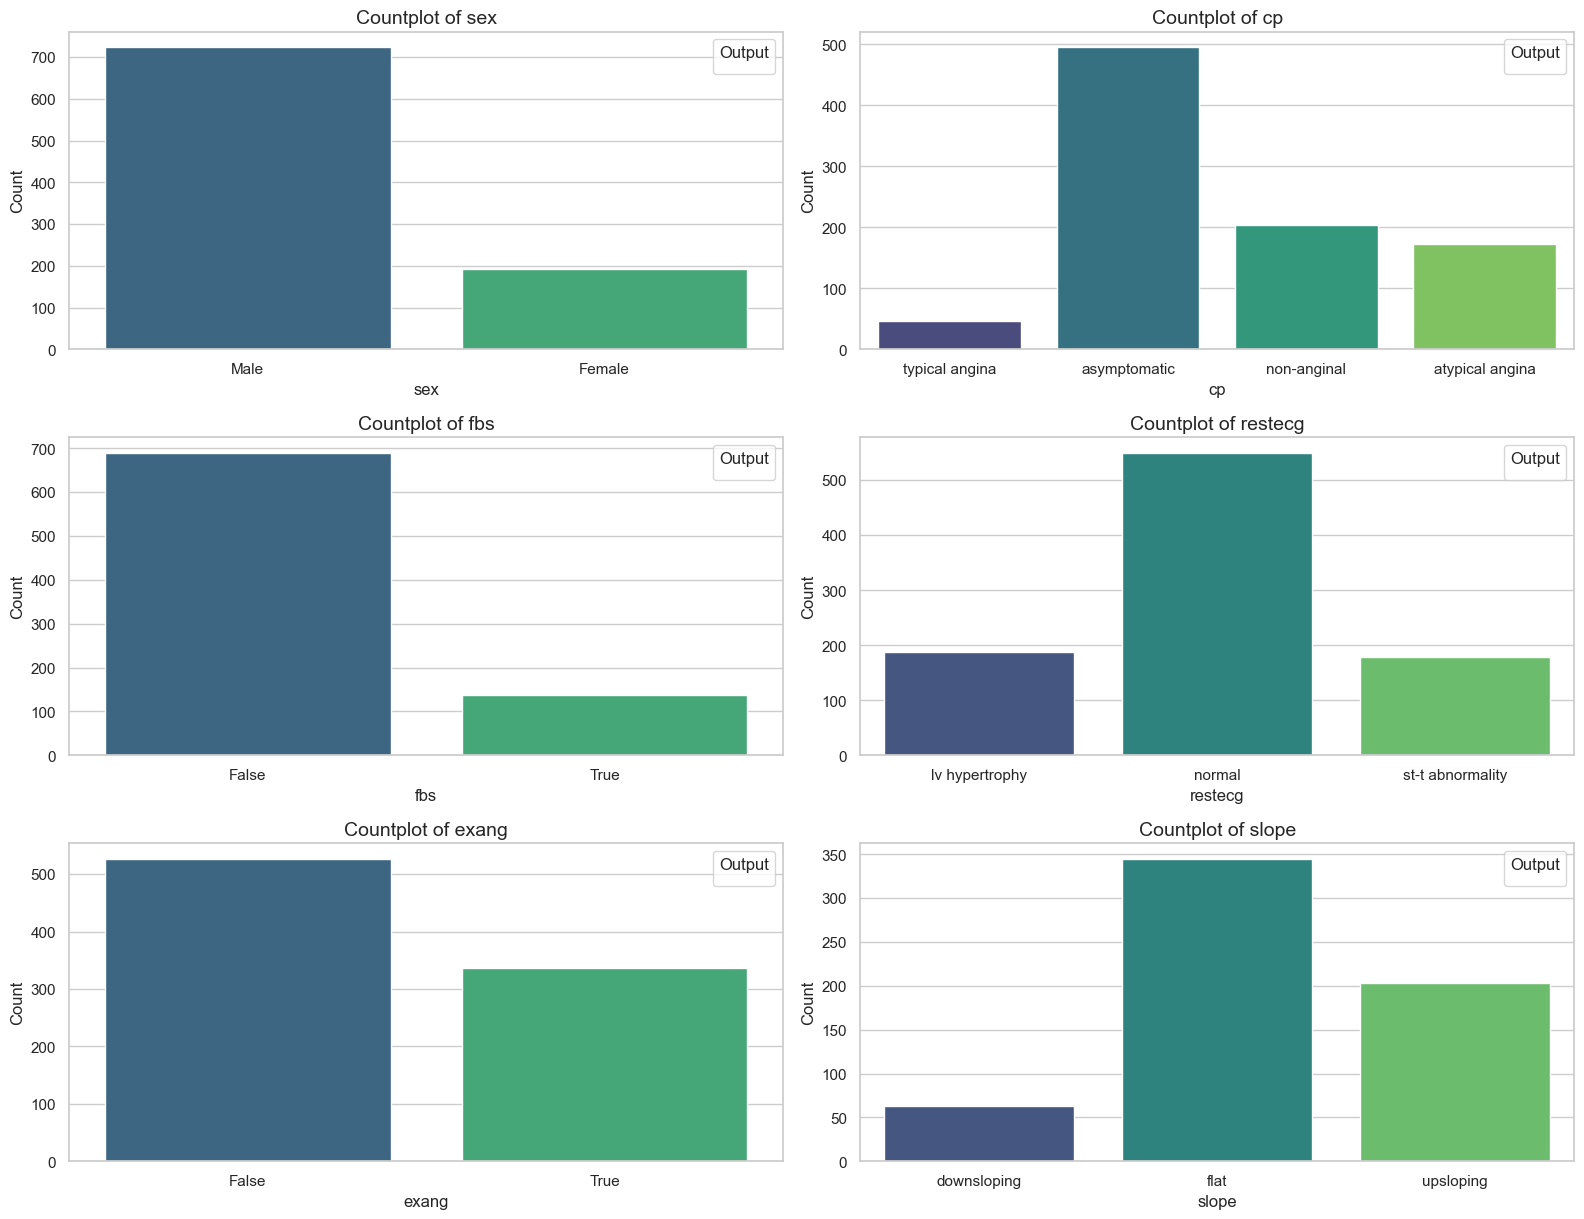

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns from earlier inspection
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Set style
sns.set(style="whitegrid")

# Create countplots for each categorical feature
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of plots
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Output", loc="upper right")

plt.tight_layout()
plt.show()

In [34]:
# Step 1: Select numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Calculate skewness
df[numeric_features].skew().sort_values(ascending=False)

oldpeak     1.131753
trestbps    0.243223
age        -0.195933
num        -0.215086
thalch     -0.235198
chol       -0.641896
dtype: float64

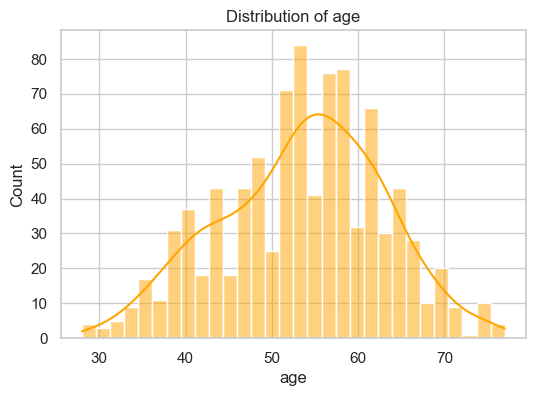

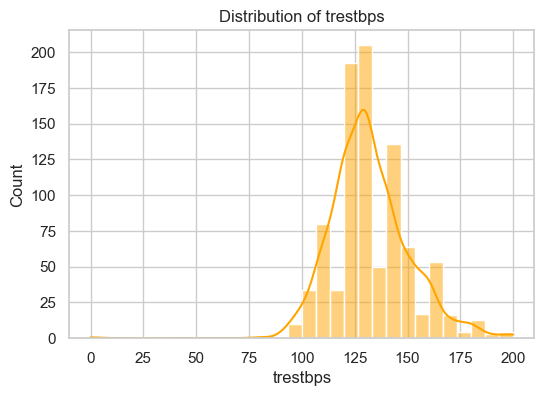

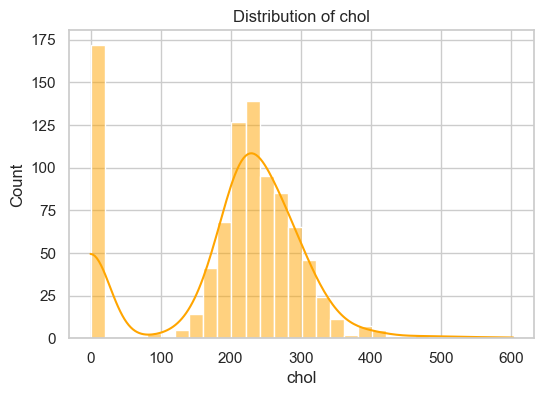

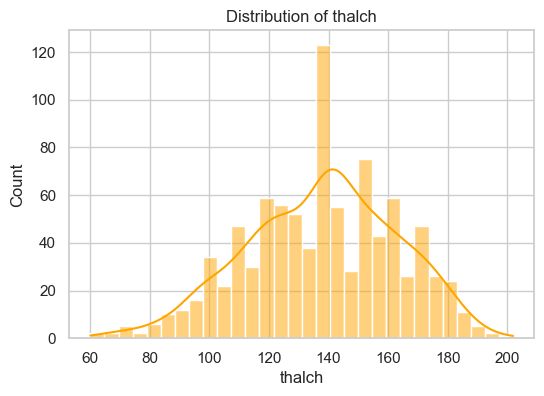

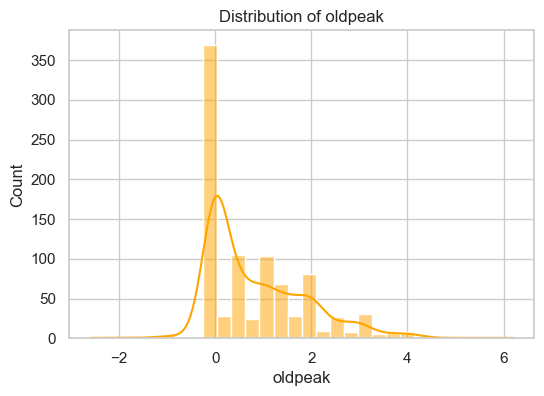

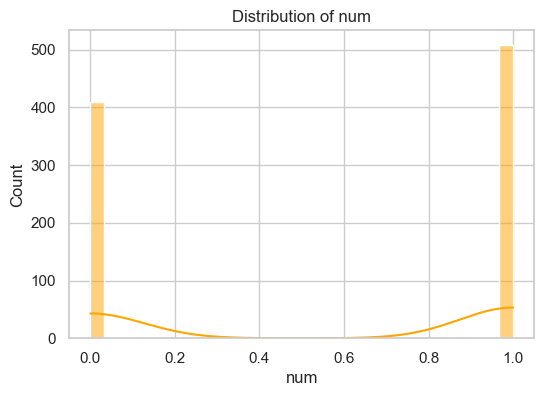

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [41]:
import numpy as np
import pandas as pd

# Step 1: Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows/columns with NaN (or impute them)
df.dropna(inplace=True)  # or use df.fillna(df.mean()) for numeric columns


In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['oldpeak']] = pt.fit_transform(df[['oldpeak']])

/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel_30665/1109746980.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')
/var/folders/v5/tzt4wn7s2v3c0rn8whwqhxs00000gn/T/ipykernel

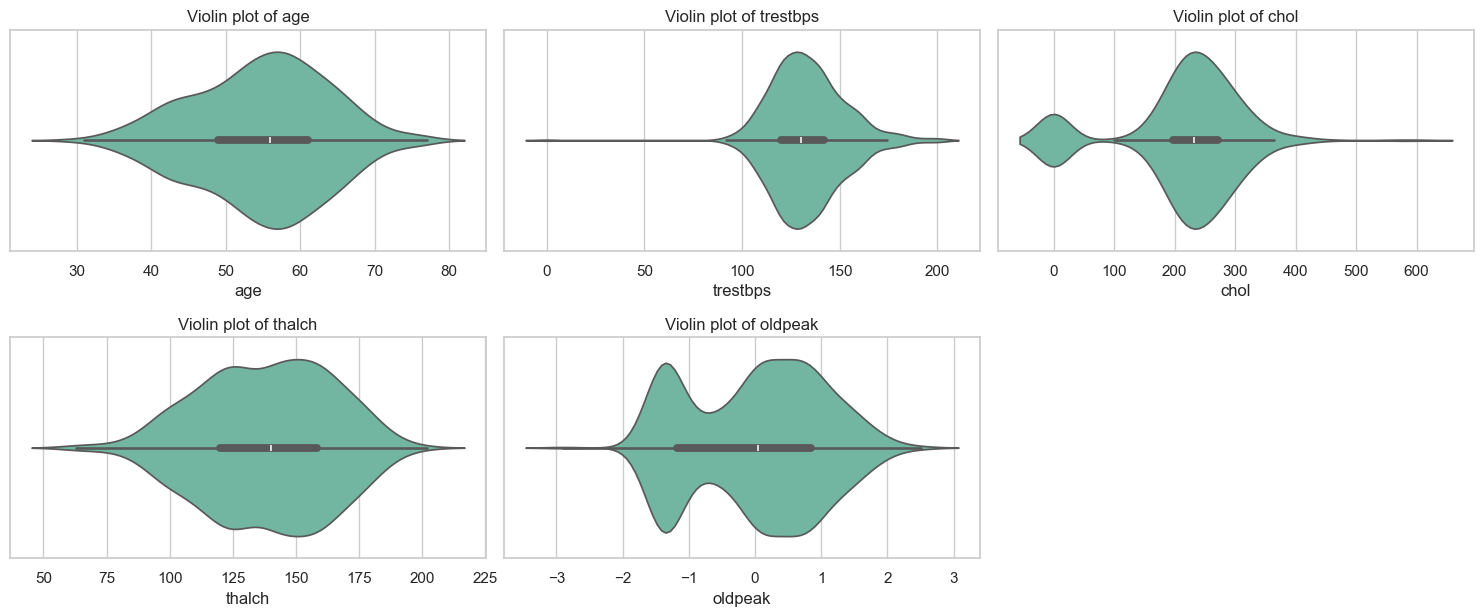

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('num')
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=df, x=col, palette='Set2')
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()

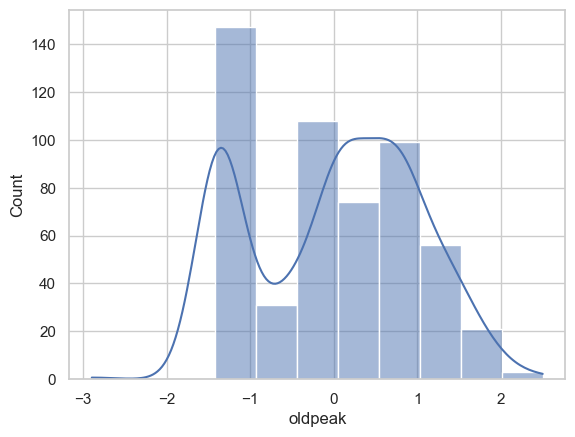

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['oldpeak'], kde=True)
plt.show()

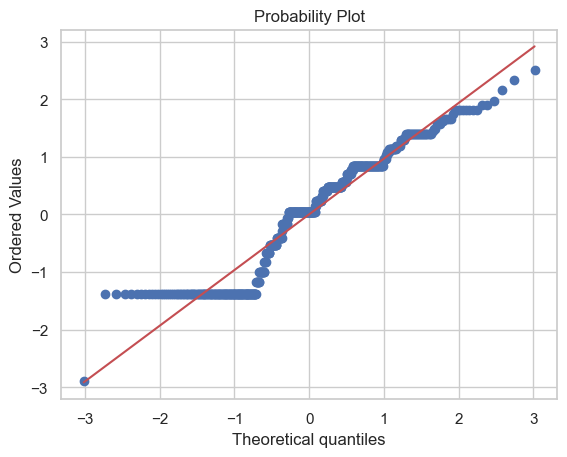

In [45]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['oldpeak'], dist="norm", plot=plt)
plt.show()

In [46]:
from scipy.stats import shapiro

stat, p = shapiro(df['oldpeak'])
print(f"Statistic={stat}, p={p}")
if p > 0.05:
    print("Data looks Gaussian")
else:
    print("Data is not Gaussian")

Statistic=0.9254771364047502, p=1.0238701697665902e-15
Data is not Gaussian


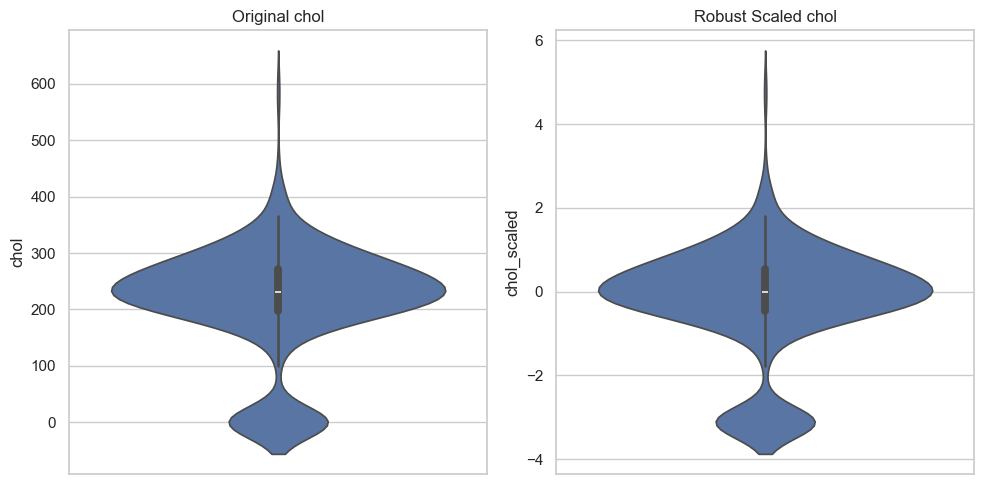

In [47]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Example: assuming df is your DataFrame and 'chol' is the column
scaler = RobustScaler()

# Reshape because scaler expects 2D input
df['chol_scaled'] = scaler.fit_transform(df[['chol']])

# Optional: Check before/after
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(y=df['chol'], ax=axes[0])
axes[0].set_title("Original chol")

sns.violinplot(y=df['chol_scaled'], ax=axes[1])
axes[1].set_title("Robust Scaled chol")

plt.tight_layout()
plt.show()

In [53]:

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Models list
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('SVC', SVC(kernel='rbf', probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models
for name, clf in models:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} -> Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")

Logistic Regression -> Train Score: 0.8264, Test Score: 0.8333
Random Forest -> Train Score: 1.0000, Test Score: 0.7778
Gradient Boosting -> Train Score: 0.9468, Test Score: 0.7870
AdaBoost -> Train Score: 0.8843, Test Score: 0.7870
SVC -> Train Score: 0.8542, Test Score: 0.8241


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KNN -> Train Score: 0.8588, Test Score: 0.7963


In [54]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Models & parameter grids
models_params = {
    'LogisticRegression': (
        LogisticRegression(max_iter=500),
        {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    'RandomForest': (
        RandomForestClassifier(random_state=42),
        {'classifier__n_estimators': [50, 100, 200],
         'classifier__max_depth': [None, 5, 10],
         'classifier__min_samples_split': [2, 5]}
    ),
    'GradientBoosting': (
        GradientBoostingClassifier(random_state=42),
        {'classifier__n_estimators': [50, 100, 200],
         'classifier__learning_rate': [0.01, 0.1, 0.2],
         'classifier__max_depth': [3, 5]}
    ),
    'SVC': (
        SVC(),
        {'classifier__C': [0.1, 1, 10],
         'classifier__kernel': ['linear', 'rbf']}
    )
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run GridSearch for each model
best_models = {}
for name, (model, params) in models_params.items():
    print(f"\n🔍 Tuning {name}...")
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Train Score: {grid.score(X_train, y_train):.4f}")
    print(f"Test Score: {grid.score(X_test, y_test):.4f}")
    print(classification_report(y_test, grid.predict(X_test)))


🔍 Tuning LogisticRegression...
Best Params for LogisticRegression: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Train Score: 0.8218
Test Score: 0.8333
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        48
           1       0.79      0.95      0.86        60

    accuracy                           0.83       108
   macro avg       0.85      0.82      0.82       108
weighted avg       0.85      0.83      0.83       108


🔍 Tuning RandomForest...
Best Params for RandomForest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Train Score: 0.9907
Test Score: 0.7963
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        48
           1       0.77      0.90      0.83        60

    accuracy                           0.80       108
   macro avg       0.81      0.78      0.79       108
weighted avg       0.80      0.80      0.79      

In [55]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib

# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Base Logistic Regression pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2', 'none'],
    'classifier__solver': ['lbfgs', 'liblinear'],
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Scores
print("Best Parameters:", grid.best_params_)
print("Train Score:", best_model.score(X_train, y_train))
print("Test Score:", best_model.score(X_test, y_test))

# Save model
joblib.dump(best_model, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Train Score: 0.8217592592592593
Test Score: 0.8333333333333334
Model saved as logistic_regression_model.pkl


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "